In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mc
from matplotlib.patches import Patch
import warnings 
warnings.filterwarnings("ignore")


from plot_utils import *
 
PLOT_DIR = './plots' # where to store the plots
RES_DIR = './model_performance' # where to store the processed model res (i.e. the df that corresponds to a plot)

# conditions
CONDITION = ["true_belief"] # add control later
QUESTION = ["Forward Belief"] # has to align with condition_name
# QUESTION = ["Forward Belief"] # has to align with condition_name
CONDITION_NAME= ["forward_belief"]
INIT_BELIEF = [0, 1] 
# METHOD = ["0shot"] #, "0shot-cot", "1shot", "1shot-cot"]

# dependencies / contingencies 
CONTINGENCY =  ['true_and_false', 'marginal'] # 'not_true_and_false', 'false_and_true', 'not_false_and_true',
# CONTINGENCY =  ['true_and_false']
# models 
# MODELS = ['openai_text-davinci-003_0', 'gpt-3.5-turbo_0', 'claude-v1.3_0', 'gpt-4_0', 'llama-65b_0']

INITIAL_BELIEF = ['0_forward', '1_forward'] # 0 hide initial belief, 1 show initial belief
VARIABLES = ['belief'] #'desire']
CONDITION = ['true_belief', 'false_belief']
MODELS = ['meta-llama_Llama-2-7b-hf_0', 'openai_text-davinci-003_0', 'gpt-3.5-turbo_0']
METHOD = ['0shot']
temperatures = [0]


# load raw model res df 
raw_results = pd.read_csv('raw_model_results.csv')

# create a pallette 
colorblind_palette = sns.color_palette("colorblind", 10)
palette = {}
change = 0.6 # used 0.6 in paper
color = 0
for model in raw_results["model_name"].unique():
    for true_false in [True, False]:
        palette[(model, true_false)] = change_saturation(colorblind_palette[color], change) \
             if true_false == True else change_saturation(colorblind_palette[color + 1], change)

In [6]:
# use this to generate all plots for the above permutations
for contingency in CONTINGENCY:
    for init_belief in INIT_BELIEF:
        for question, condition_name in zip(QUESTION, CONDITION_NAME):
            # loop over models
            for method in METHOD:
               
                
                for condition in CONDITION:
                    df_list = []
                    print(f'Running {condition_name} {init_belief} {contingency} {method} {condition}')
                    for model in MODELS:
                        print(model)
                        df = get_plot_df(raw_results, 
                                        model_name=model, 
                                        init_belief=init_belief,
                                        condition=condition,
                                        method=method, 
                                        contingency=contingency)
                        print(df)
                        df_list.append(df)
                    df = pd.concat(df_list) 
                    # prepare final structure for plotting 

                    print(df)
                    df['Question'] = pd.Categorical(df['Question'], [question])
                    df.sort_values('Question', inplace=True, ascending=False)
                    # TODO: make more concise
                    grouped_df = df.groupby(['Question', 'model_name', 'Type']).agg({'Average Accuracy': 'mean'}).unstack(['model_name', 'Type']).sort_index(axis=1, level=['model_name', 'Type'], ascending=False)
                    # reorder based on preferred x axes for models
                    current_columns = grouped_df.columns.tolist()
                    # TODO this is a mess, clean up (order in which we want models on the x axis, sort_values above messes up with the order we want)
                    sorted_columns = current_columns[4:8] + current_columns[:4] + current_columns[12:16] + current_columns[16:] + current_columns[8:12] 
                    # assign sorted columns back to your DataFrame
                    grouped_df = grouped_df[sorted_columns]
                    # write to csv
                    grouped_df.to_csv(f'{RES_DIR}/{condition_name}_{init_belief}_{condition}_{method}_{contingency}.csv', index=False)
                    # plot 
                    plot_model(grouped_df, 
                                palette=palette, 
                                plot_dir=PLOT_DIR, 
                                init_belief=init_belief,
                                condition=condition_name,
                                method=method,
                                contingency=contingency)

Running forward_belief 0 true_and_false 0shot true_belief
meta-llama_Llama-2-7b-hf_0
Empty DataFrame
Columns: [correct, Question, Type, Method, model_name]
Index: []
openai_text-davinci-003_0
Empty DataFrame
Columns: [correct, Question, Type, Method, model_name]
Index: []
gpt-3.5-turbo_0
Empty DataFrame
Columns: [correct, Question, Type, Method, model_name]
Index: []
Empty DataFrame
Columns: [correct, Question, Type, Method, model_name]
Index: []


KeyError: "Column(s) ['Average Accuracy'] do not exist"

Running forward_belief 1 true_and_false 0shot
model_name     llama-65b_0       openai_text-davinci-003_0         \
Type                 True  False                     True   False   
Question                                                            
Forward Belief        0.43  0.41                      0.27  0.245   

model_name     gpt-3.5-turbo_0       claude-v1.3_0        gpt-4_0        \
Type                     True  False         True   False   True  False   
Question                                                                  
Forward Belief            0.35  0.31          0.62  0.585    0.91   0.9   

model_name       human         
Type             True   False  
Question                       
Forward Belief  0.9875  0.975  


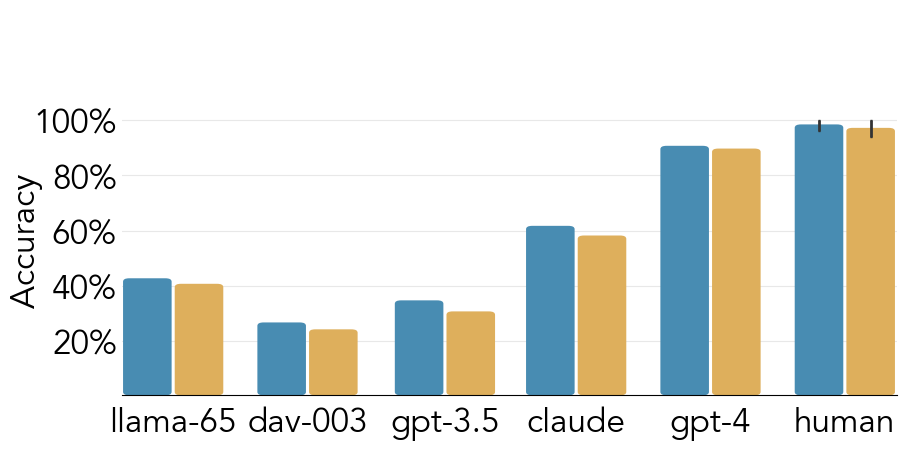

Running backward_belief 1 true_and_false 0shot
model_name      llama-65b_0       openai_text-davinci-003_0         \
Type                  True  False                     True   False   
Question                                                             
Backward Belief        0.35  0.34                     0.115  0.085   

model_name      gpt-3.5-turbo_0        claude-v1.3_0       gpt-4_0         \
Type                      True   False         True  False   True   False   
Question                                                                    
Backward Belief             0.1  0.065          0.29  0.15    0.62  0.395   

model_name        human         
Type              True   False  
Question                        
Backward Belief  0.8125  0.725  


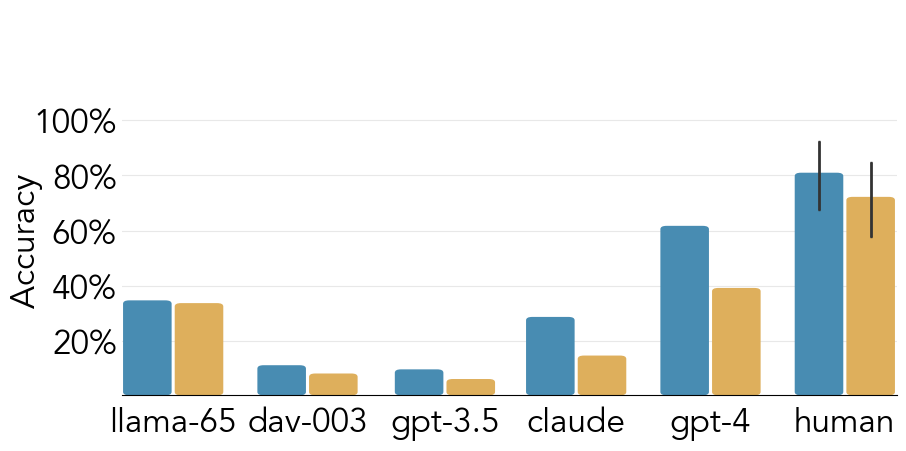

Running forward_action 1 true_and_false 0shot
model_name     llama-65b_0       openai_text-davinci-003_0         \
Type                 True  False                     True   False   
Question                                                            
Forward Action        0.76  0.46                      0.96  0.285   

model_name     gpt-3.5-turbo_0        claude-v1.3_0       gpt-4_0         \
Type                     True   False         True  False   True   False   
Question                                                                   
Forward Action           0.965  0.195         0.985  0.42    0.98  0.895   

model_name      human         
Type            True   False  
Question                      
Forward Action  0.925  0.775  


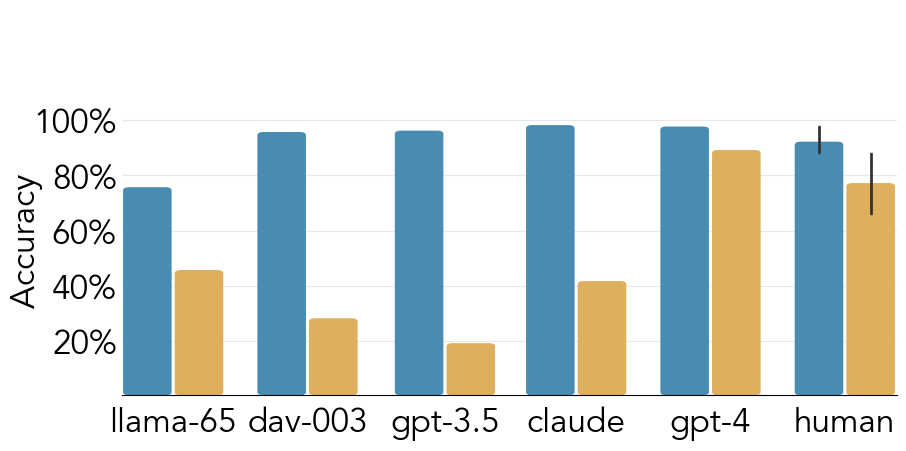

In [3]:
# adding human for fig 3 in paper
df_human_forward_belief = {
    'model_name': ['human', 'human'],
    'Method': ['0shot', '0shot'],
    'Type': [False, True],
    'Question': ['Forward Belief', 'Forward Belief'],
    'Error': [(0.938, 1.0), (0.962, 1.0)],
    'Average Accuracy': [0.9750, 0.9875]
} 
df_human_backward_belief = {
    'model_name': ['human', 'human'],
    'Method': ['0shot', '0shot'],
    'Type': [False, True],
    'Question': ['Backward Belief', 'Backward Belief'],
    'Error': [(0.575, 0.85), (0.675, 0.925)],
    'Average Accuracy': [0.7250, 0.8125]
} 
df_human_forward_action = {
    'model_name': ['human', 'human'],
    'Method': ['0shot', '0shot'],
    'Type': [False, True],
    'Question': ['Forward Action', 'Forward Action'],
    'Error': [(0.66, 0.88), (0.88, 0.98)],
    'Average Accuracy': [0.7750, 0.9250]
}

df_human_forward_belief = pd.DataFrame(df_human_forward_belief)
df_human_backward_belief = pd.DataFrame(df_human_backward_belief)
df_human_forward_action = pd.DataFrame(df_human_forward_action)


CONTINGENCY = ['true_and_false'] # only these are relevant for the figure
INIT_BELIEF = [1]
METHOD = ['0shot']

# create a pallette 
colorblind_palette = sns.color_palette("colorblind", 10)
palette = {}
change = 0.6 # used 0.6 in paper
color = 0
for model in MODELS + ['human']:
    for true_false in [True, False]:
        palette[(model, true_false)] = change_saturation(colorblind_palette[color], change) \
             if true_false == True else change_saturation(colorblind_palette[color + 1], change)

# use this to generate all plots for the above permutations
for contingency in CONTINGENCY:
    for init_belief in INIT_BELIEF:
        for question, condition_name in zip(QUESTION, CONDITION_NAME):
            # loop over models
            for method in METHOD:
                print(f'Running {condition_name} {init_belief} {contingency} {method}')
                df_list = [df_human_forward_belief, df_human_backward_belief, df_human_forward_action]
                for model in MODELS:
                    df = get_plot_df(raw_results, 
                                    model_name=model, 
                                    init_belief=init_belief,
                                    condition=CONDITION, 
                                    method=method, 
                                    contingency=contingency)
                    df_list.append(df)
                df = pd.concat(df_list) 
                # prepare final structure for plotting 
                df['Question'] = pd.Categorical(df['Question'], [question])
                df.sort_values('Question', inplace=True, ascending=False)
                # TODO: make more concise
                grouped_df = df.groupby(['Question', 'model_name', 'Type']).agg({'Average Accuracy': 'mean', 'Error': 'first'}).unstack(['model_name', 'Type']).sort_index(axis=1, level=['model_name', 'Type'], ascending=False)
                # reorder based on preferred x axes for models
                current_columns = grouped_df.columns.tolist()
                # TODO this is a mess, clean up (order in which we want models on the x axis, sort_values above messes up with the order we want)
                sorted_columns = current_columns[4:8] + current_columns[:4] + current_columns[16:20] + current_columns[20:] + current_columns[12:16] + current_columns[8:12]
                
                # assign sorted columns back to your DataFrame
                grouped_df = grouped_df[sorted_columns]

                # plot 
                plot_model_with_human(grouped_df, 
                            palette=palette, 
                            plot_dir=PLOT_DIR, 
                            init_belief=init_belief,
                            condition=condition_name + '_human',
                            method=method,
                            contingency=contingency)